In [1]:
# Importation des librairies
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = sns.load_dataset("iris")
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:

sns.swarmplot(x='species', y="petal_length",data=data)

ValueError: Could not interpret value `petal_length` for parameter `y`

In [4]:
data.drop(columns=["sepal_width", "petal_length","petal_width"], axis=1, inplace=True)
# df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)
data.head()

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa


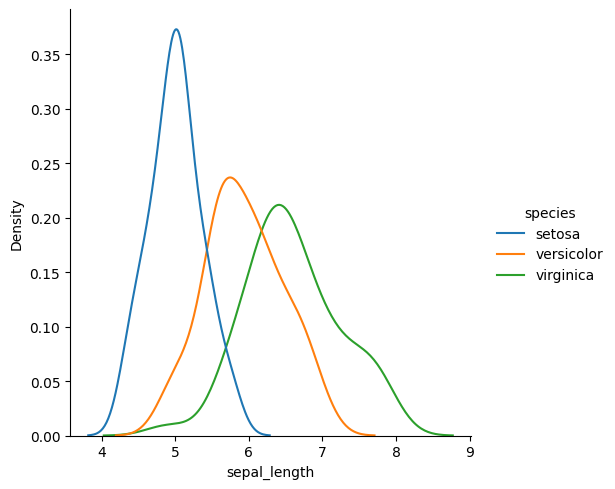

In [5]:
# on va travailler avec un seul feature pour l'exemple
selected_feature = "sepal_length"
selected_target = [selected_feature, 'species']
sns.displot(data=data[selected_target], x=selected_feature,hue="species", kind='kde')

## Analyse
on voit que pour les fleurs de type setosa, l'expression du sepal_lenght = 5 (beaucoup de fleurs)

In [6]:
## Création de matrice de données : Jeu d"entrainement et jeu de test 
X= data.drop("species", axis=1)
y = data["species"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("train size", X_train.shape)
print("test size", X_test.shape)

train size (120, 1)
test size (30, 1)


In [8]:
# Entrainement du modèle de décision ( Décision Tree)
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')

In [9]:
# Entrainement sur les données TRAIN 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [10]:
# Affichage du seuil de décision avec export_text
from sklearn.tree import export_text, plot_tree
decision_tree_test = export_text(classifier, feature_names=list(X_train.columns))
print(decision_tree_test)

|--- sepal_length <= 5.45
|   |--- sepal_length <= 4.85
|   |   |--- class: setosa
|   |--- sepal_length >  4.85
|   |   |--- class: setosa
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: versicolor
|   |--- sepal_length >  6.15
|   |   |--- class: virginica



[Text(0.5, 0.8333333333333334, 'sepal_length <= 5.45\nentropy = 1.58\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.25, 0.5, 'sepal_length <= 4.85\nentropy = 0.73\nsamples = 44\nvalue = [37, 6, 1]\nclass = setosa'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0]\nclass = setosa'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.89\nsamples = 32\nvalue = [25, 6, 1]\nclass = setosa'),
 Text(0.75, 0.5, 'sepal_length <= 6.15\nentropy = 1.2\nsamples = 76\nvalue = [3, 35, 38]\nclass = virginica'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.22\nsamples = 34\nvalue = [3, 22, 9]\nclass = versicolor'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.89\nsamples = 42\nvalue = [0, 13, 29]\nclass = virginica')]

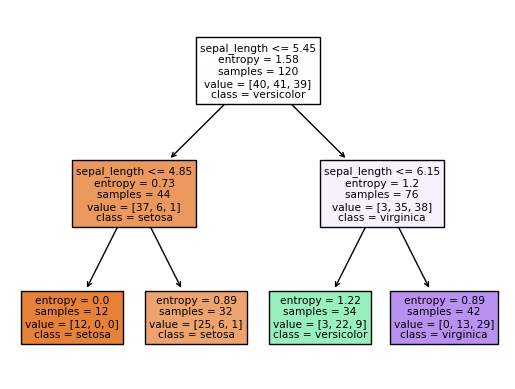

In [11]:
# Visualisation de l'arbre de décision
plot_tree(classifier, feature_names=list(X_train.columns), class_names=y.unique(), precision=2, filled=True)


In [12]:
classifier.score(X_test, y_test)

0.8